In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pickle
import os

## Download the dataset

In [3]:
features = 'F0'

project_root =  os.path.dirname(os.path.dirname(os.getcwd()))
df = pd.read_csv(f'{project_root}/data/CommonVoice/{features}_data.csv')
df.head()

,FileName,nobs_pitch,mean_pitch,skew_pitch,kurtosis_pitch,median_pitch,mode_pitch,std_pitch,low_pitch,peak_pitch,q25_pitch,q75_pitch,iqr_pitch,Gender
0,common_voice_pt_19564750.wav,450,32.035183,0.972012,-0.981352,0.0,0.0,50.396068,0.0,128.648345,0.0,96.043054,96.043054,1
1,common_voice_pt_19547806.wav,354,39.350998,1.124757,-0.348730,0.0,0.0,62.423567,0.0,196.907409,0.0,103.718125,103.718125,1
2,common_voice_pt_21663026.wav,503,70.913316,0.793729,0.438292,0.0,0.0,83.491512,0.0,427.454221,0.0,143.844853,143.844853,1
3,common_voice_pt_19435786.wav,431,44.169803,0.560495,-1.649479,0.0,0.0,57.744707,0.0,141.789897,0.0,116.452867,116.452867,1
4,common_voice_pt_20523845.wav,323,31.394417,0.692724,-1.492219,0.0,0.0,43.823478,0.0,110.330730,0.0,87.438317,87.438317,1


## Split the dataset into training and test data
Let's use 20% of the database for testing.

We also need to make sure the classes(Genders) are equally distributed between the classes.

In [13]:
mydata_train, mydata_test = train_test_split(df, random_state=0, test_size=0.2)

print(f'Feminine voices in the training data: {len(mydata_train.Gender)- sum(mydata_train.Gender)}')
print(f'Masculine voices in the training data: {sum(mydata_train.Gender)}')
print(f'Feminine voices in the test data: {len(mydata_test.Gender)- sum(mydata_test.Gender)}')
print(f'Masculine voices in the test data: {sum(mydata_test.Gender)}')


Feminine voices in the training data: 215
Masculine voices in the training data: 205
Feminine voices in the test data: 48
Masculine voices in the test data: 58


In [14]:
mydata_train.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,q25,q75,iqr,Gender
355,common_voice_pt_19433122.wav,55,1080.545455,1.696417,1.890906,345.0,0.0,1571.253892,0.0,5865.000000,120.00,1215.00,1095.00,1
175,common_voice_pt_20438859.wav,76,474.735910,4.858885,24.026423,285.0,135.0,847.264129,0.0,5325.000000,161.25,450.00,288.75,1
298,common_voice_pt_19485105.wav,81,501.296296,4.020884,18.611434,300.0,0.0,838.530011,0.0,5355.000000,150.00,420.00,270.00,1
523,common_voice_pt_20433681.wav,60,576.635593,6.223600,40.278957,285.0,90.0,1442.391918,90.0,10838.135593,90.00,588.75,498.75,0
165,common_voice_pt_19399154.wav,60,875.250000,3.185185,10.240942,150.0,0.0,2035.533391,0.0,11025.000000,0.00,525.00,525.00,0


In [15]:
if features == 'MFCCs':
    data_x_train = mydata_train[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'Features':
    data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'Features_MFCCs':
    data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'F0':
    data_x_train = mydata_train[['nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'F0_MFCCs':
    data_x_train = mydata_train[['nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'Features_F0_MFCCs':
    data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr',
        'nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr',
        'nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

In [16]:
scaler = StandardScaler()
scaler.fit(data_x_train)
X_train = pd.DataFrame(scaler.transform(data_x_train), columns=data_x_train.columns)
X_test = pd.DataFrame(scaler.transform(data_x_test), columns=data_x_test.columns)
pickle.dump(scaler, open(f'{project_root}/models/MLS/{features}/scaler.pkl', 'wb'))

In [17]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
filename = '{project_root}/models/MLS/{features}}/DecisionTree.sav'
pickle.dump(tree, open(filename, 'wb'))
print("\nDecision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
filename = f'{project_root}/models/MLS/{features}/RandomForest.sav'
pickle.dump(forest, open(filename, 'wb'))
print("\nRandom Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
filename = f'{project_root}/models/MLS/{features}/GradientBoosting.sav'
pickle.dump(gbrt, open(filename, 'wb'))
print("\nGradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

#Train support vector machine model
svm = SVC().fit(X_train, y_train)
filename = f'{project_root}/models/MLS/{features}/SVM.sav'
pickle.dump(svm, open(filename, 'wb'))
print("\nSupport Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
filename = f'{project_root}/models/MLS/{features}/MLP.sav'
pickle.dump(mlp, open(filename, 'wb'))
print("\nMultilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))


Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.613

Random Forests
Accuracy on training set: 0.979
Accuracy on test set: 0.632

Gradient Boosting
Accuracy on training set: 0.990
Accuracy on test set: 0.755

Support Vector Machine
Accuracy on training set: 0.810
Accuracy on test set: 0.745

Multilayer Perceptron
Accuracy on training set: 0.790
Accuracy on test set: 0.764


/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
def plot_feature_importances_mydata(model, c):
    n_features = len(X_train.columns)
    plt.figure(1,figsize=(18,10))
    plt.bar(range(n_features), model.feature_importances_, align='center', color=c)
    plt.xticks(np.arange(n_features), X_train.columns)
    plt.ylabel("Variable importance")
    plt.xlabel("Independent Variable")
    plt.title(model.__class__.__name__)
    plt.show()

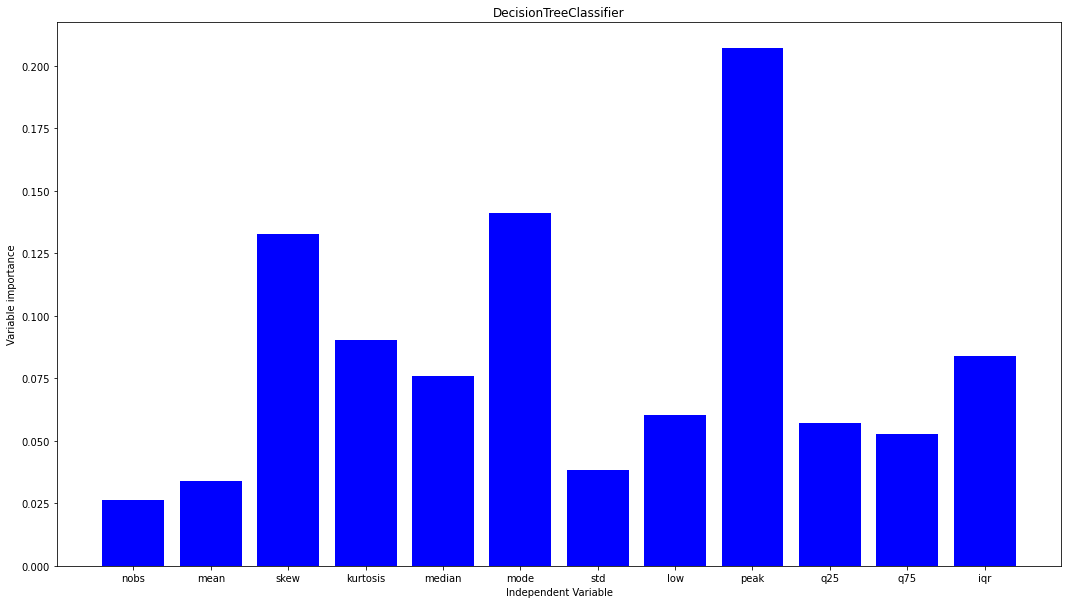

In [19]:
plot_feature_importances_mydata(tree,'blue')

In [23]:
import tensorflow as tf
from tensorflow import keras

NeuralNetwork = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

NeuralNetwork.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = NeuralNetwork.fit(X_train, y_train,validation_split=0.2, epochs=100, verbose=4)

test_loss, test_acc = NeuralNetwork.evaluate(X_test,  y_test, verbose=0)


print('\nTest accuracy:', test_acc)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50

Test accuracy: 0.650943398475647


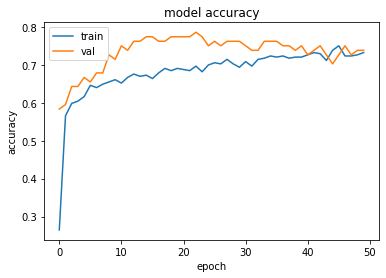

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

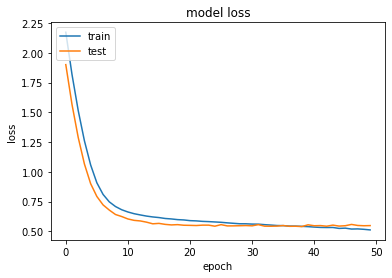

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()